In the exploratory data analysis,I will be looking at the data and try to understand the data. I will be analyzing the data to find the relationship between the features and the target variable. I will begin with looking at the distribution of data across all the variables. Then I will look at the relationship between the features and the target variable.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("cleaned_data.csv")

In [7]:
df.head()

,Unnamed: 0,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,0,50,2,110,80,1,1,0,0,1,0,21.967120
1,1,1,55,1,140,90,3,1,0,0,1,1,34.927679
2,3,3,48,2,150,100,1,1,0,0,1,1,28.710479
3,6,9,60,1,130,80,3,1,0,0,1,0,37.729725
4,8,13,48,1,110,70,1,1,0,0,1,0,28.440955


## Patient demographics

C:\Users\Jincy Denny\AppData\Local\Temp\ipykernel_11520\4005909756.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')


Text(0.5, 1.0, 'BMI Distribution')

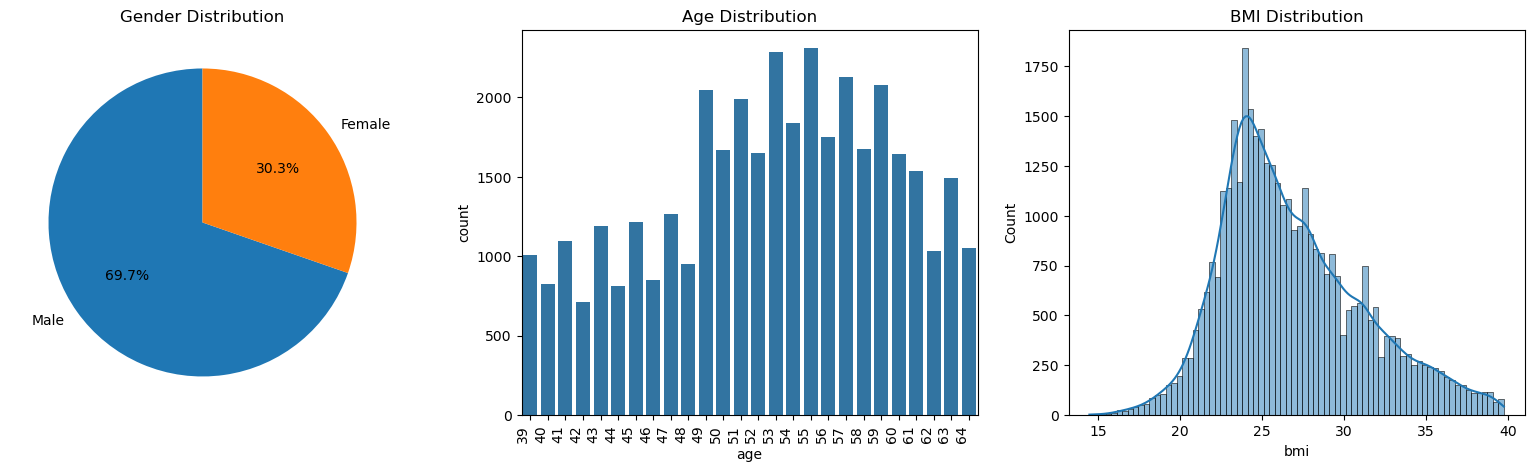

In [8]:
fig, ax = plt.subplots(1,3,figsize=(20, 5))
ax[0].pie(df['gender'].value_counts(), labels = ['Male', 'Female'], autopct='%1.1f%%', startangle=90)
ax[0].set_title('Gender Distribution')
sns.countplot(x = 'age', data = df, ax = ax[1]).set_title('Age Distribution')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')
sns.histplot(x = 'bmi', data = df, ax = ax[2], kde = True).set_title('BMI Distribution')

The three graphs illustrate the demographic characteristics of patients in the dataset. The majority are male (68.9%), and most patients are aged above 45, with a peak around 52–58 years. The BMI distribution is right-skewed, with the majority of values between 22 and 32 — indicating that most patients fall into the normal to overweight category. While this may suggest a potential link between higher BMI and cardiovascular disease.

## BMI Versus Cardio

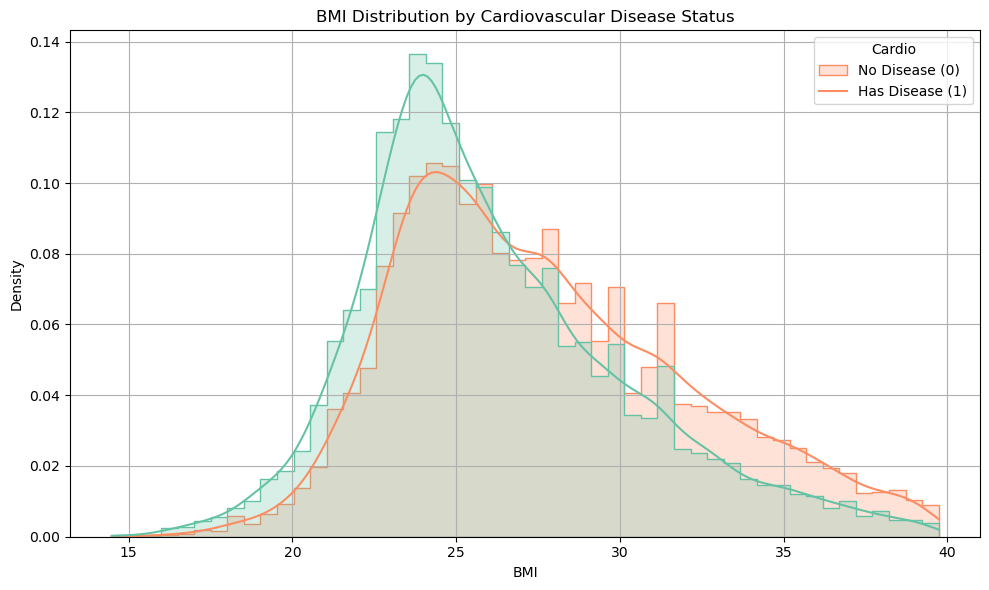

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bmi', hue='cardio', bins=50, kde=True,
             stat='density', common_norm=False, palette='Set2', element='step')

plt.title('BMI Distribution by Cardiovascular Disease Status')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.legend(title='Cardio', labels=['No Disease (0)', 'Has Disease (1)'])
plt.grid(True)
plt.tight_layout()
plt.show()

Here's the histogram of BMI distribution by cardiovascular disease status:

📊 Interpretation:
Red Line (cardio = 0): Patients without cardiovascular disease.

Blue Line (cardio = 1): Patients with cardiovascular disease.

✅ What the chart tells us:
Patients with higher BMI values (28–35+) are more likely to have cardiovascular disease.

Patients without the disease (red) tend to cluster around lower BMI values (22–26).

The blue distribution (cardio = 1) is visibly right-shifted, meaning higher BMI is associated with increased cardiovascular risk in this dataset.

Patients with higher BMI are more likely to have cardiovascular disease.

In [10]:
df.head()

,Unnamed: 0,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,0,50,2,110,80,1,1,0,0,1,0,21.967120
1,1,1,55,1,140,90,3,1,0,0,1,1,34.927679
2,3,3,48,2,150,100,1,1,0,0,1,1,28.710479
3,6,9,60,1,130,80,3,1,0,0,1,0,37.729725
4,8,13,48,1,110,70,1,1,0,0,1,0,28.440955


# Medical History

In [11]:
df_plot = df.copy()
df_plot['cholesterol'] = df_plot['cholesterol'].map({1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'})
df_plot['gluc'] = df_plot['gluc'].map({1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'})
df_plot['active'] = df_plot['active'].map({0: 'No', 1: 'Yes'})

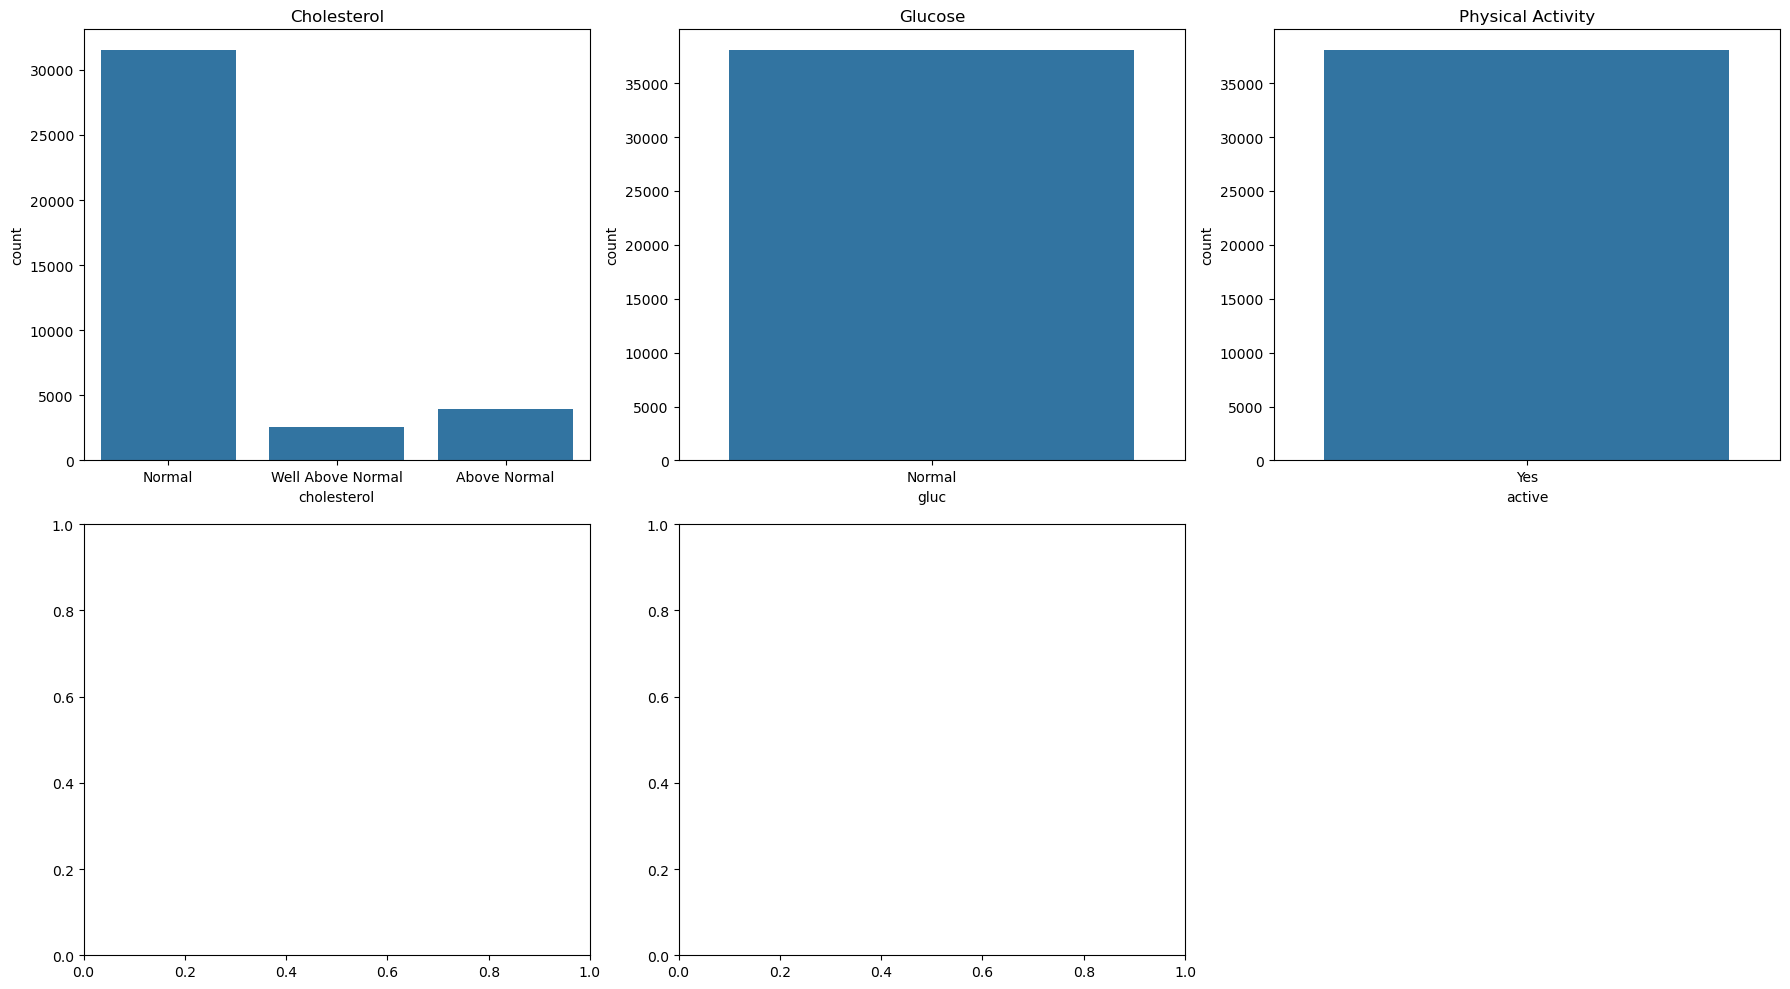

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 3, figsize=(18, 10))

sns.countplot(x='cholesterol', data=df_plot, ax=ax[0, 0])
ax[0, 0].set_title('Cholesterol')

sns.countplot(x='gluc', data=df_plot, ax=ax[0, 1])
ax[0, 1].set_title('Glucose')

sns.countplot(x='active', data=df_plot, ax=ax[0, 2])
ax[0, 2].set_title('Physical Activity')

#sns.countplot(x='bp_category', data=df_plot, ax=ax[1, 0])
#ax[1, 0].set_title('Blood Pressure Category')
#ax[1, 0].tick_params(axis='x', rotation=45)

#sns.countplot(x='bp_category_encoded', data=df_plot, ax=ax[1, 1])
#ax[1, 1].set_title('BP Category Encoded')
#ax[1, 1].tick_params(axis='x', rotation=45)

fig.delaxes(ax[1, 2])  # Remove unused subplot

plt.tight_layout()
plt.show()


Many patients may have poor lipid and glucose profiles, low physical activity, and elevated blood pressure — all of which cluster as cardiovascular risk factors.

This supports the idea that the dataset reflects a realistic high-risk population, making it useful for predictive modeling.

## Patient's Smoking History

C:\Users\Jincy Denny\AppData\Local\Temp\ipykernel_11520\4165089883.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="smoke", palette="Set2")


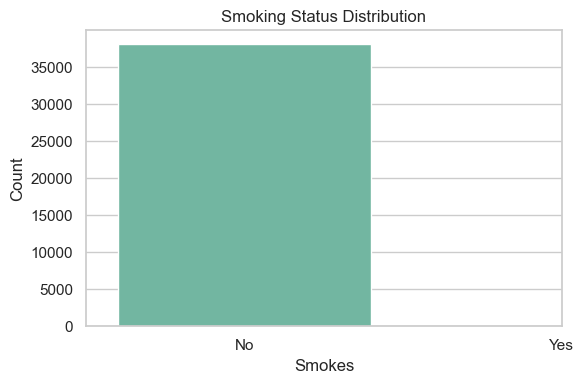

In [13]:
sns.set(style="whitegrid")

# Create the countplot for smoking status
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="smoke", palette="Set2")
plt.xticks([0, 1], ['No', 'Yes'])  # Replace 0 and 1 with labels
plt.title("Smoking Status Distribution")
plt.xlabel("Smokes")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Even though smoking is not highly prevalent, other major medical risk factors (high cholesterol, high glucose, poor activity, and hypertension) are still widely present in the population.

This suggests that non-lifestyle-related factors (genetics, diet, or existing conditions) may play a dominant role in the health risk profile of the dataset's population.

## Coorelation Matrix Heatmap

<Axes: >

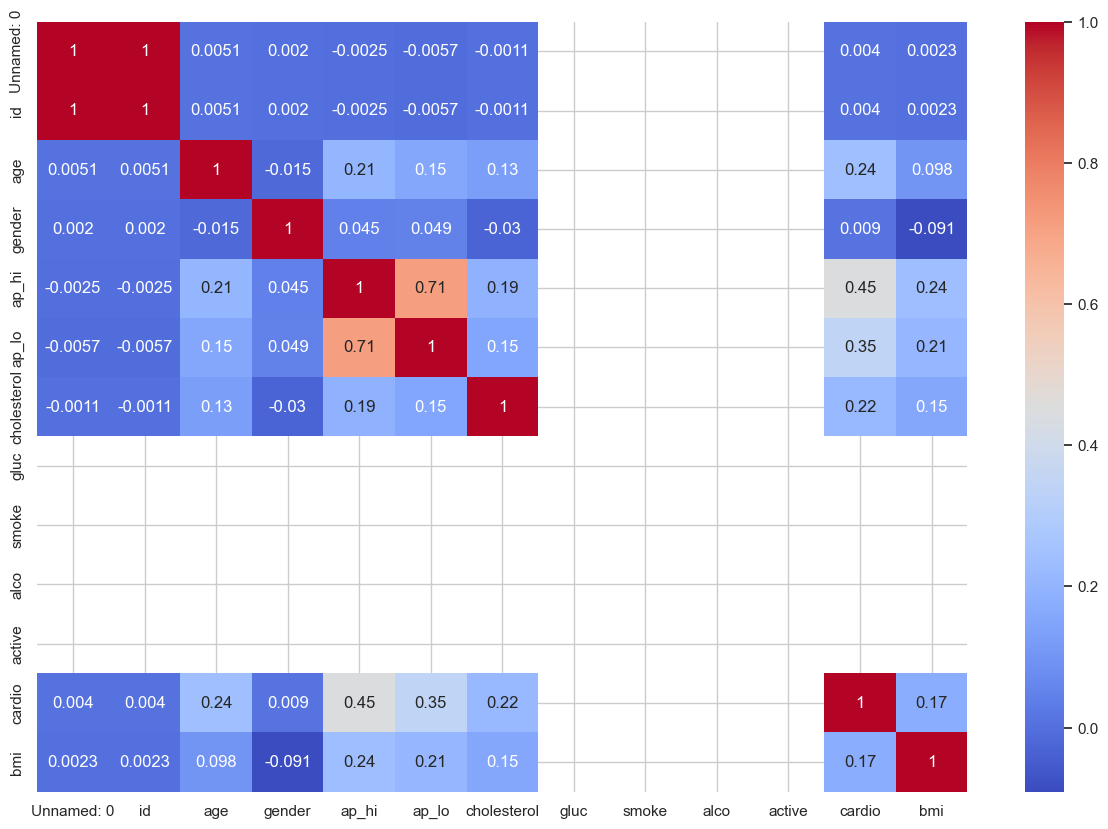

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

### 📊 **Insights from the Correlation Heatmap**



---

### 🔍 **1. Age and Cardiovascular Disease**

* **Positive correlation between `age` and `cardio`**

  * As age increases, the likelihood of cardiovascular disease (CVD) also increases.
  * This is consistent with medical knowledge: older individuals have higher risk due to cumulative exposure to risk factors.

---

### 🔍 **2. Systolic and Diastolic Blood Pressure**

* **High correlation between `ap_hi` (systolic) and `ap_lo` (diastolic)**

  * These values naturally track together and indicate consistent blood pressure readings.
  * Either one could serve as a proxy for blood pressure trends in predictive modeling.

---

### 🔍 **3. Cholesterol and CVD**

* **Moderate positive correlation between `cholesterol` and `cardio`**

  * Elevated cholesterol levels are associated with a higher chance of cardiovascular problems.
  * Supports clinical guidelines recommending cholesterol management for heart health.

---

### 🔍 **4. Glucose and CVD**

* **Slight positive correlation between `gluc` and `cardio`**

  * People with higher glucose levels (e.g., diabetics or pre-diabetics) are more likely to have CVD.
  * This supports known associations between diabetes and cardiovascular conditions.

---

### 🔍 **5. Physical Activity and CVD**

* **Slight negative correlation between `active` and `cardio`**

  * Active individuals tend to have lower cardiovascular risk.
  * Encourages promotion of physical activity as a preventive measure.

---

### 🧠 **What’s Not Strongly Correlated:**

* Variables like `smoke` or `alco` often have **weak or near-zero correlation** with `cardio` in such datasets.

  * This doesn’t mean they are unimportant — rather, their effects may be **non-linear** or **indirect**, and better captured in more advanced models (e.g., logistic regression or decision trees).

---

### 📌 Summary of Key Risk Correlates:

| Feature         | Correlation with `cardio` | Insight                            |
| --------------- | ------------------------- | ---------------------------------- |
| `age`           | High positive             | Older age increases CVD risk       |
| `cholesterol`   | Moderate positive         | High cholesterol linked to CVD     |
| `ap_hi`/`ap_lo` | Moderate positive         | High BP linked to CVD              |
| `gluc`          | Low to moderate positive  | High glucose contributes to CVD    |
| `active`        | Slight negative           | Physical activity reduces CVD risk |

---




In [16]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df.drop(columns=['cardio'])
y = df["cardio"]

# 80% training, 20% testing split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)
